In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pathlib
from time import perf_counter

In [18]:
df_res = pd.DataFrame(columns=["n_splits", "n", "time"])
ps = []

for n_splits in range(2, 11): 
    res = pd.read_csv(f"dm_{n_splits}.csv")
    res['n_splits'] = n_splits

    x = res['n'].values
    y = res['time'].values
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    ps.append(p)

    df_res = pd.concat([df_res, res])

In [19]:
df_baseline = pd.read_csv("../../time_complexity_dbscan.csv")
df_baseline = df_baseline.rename(columns={"Unnamed: 0": "n", "DBSCAN": "time"})
x = df_baseline['n'].values
y = df_baseline['time'].values
z = np.polyfit(x, y, 2)
p_baseline = np.poly1d(z)

In [20]:
sns.set_style("whitegrid")

<AxesSubplot: xlabel='n', ylabel='time'>

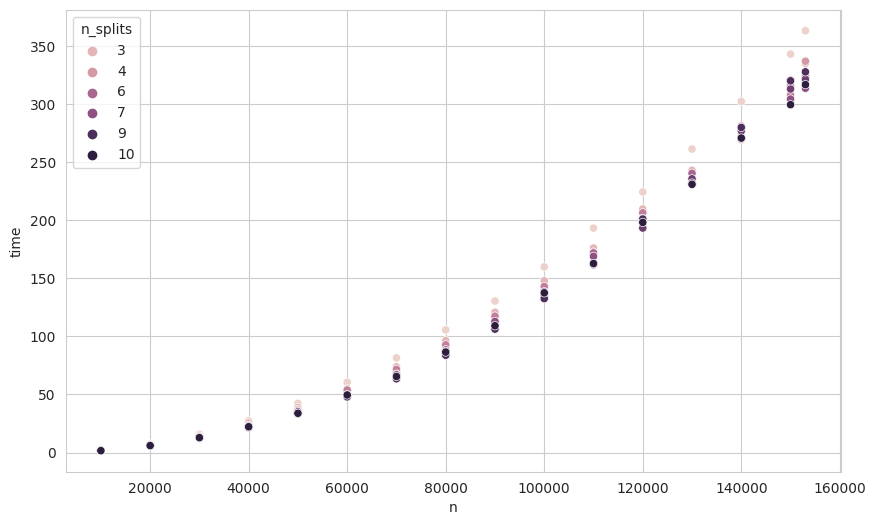

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="n", y="time", hue="n_splits", data=df_res, ax=ax)

Text(0.5, 1.0, 'Time estimate for multiple splits')

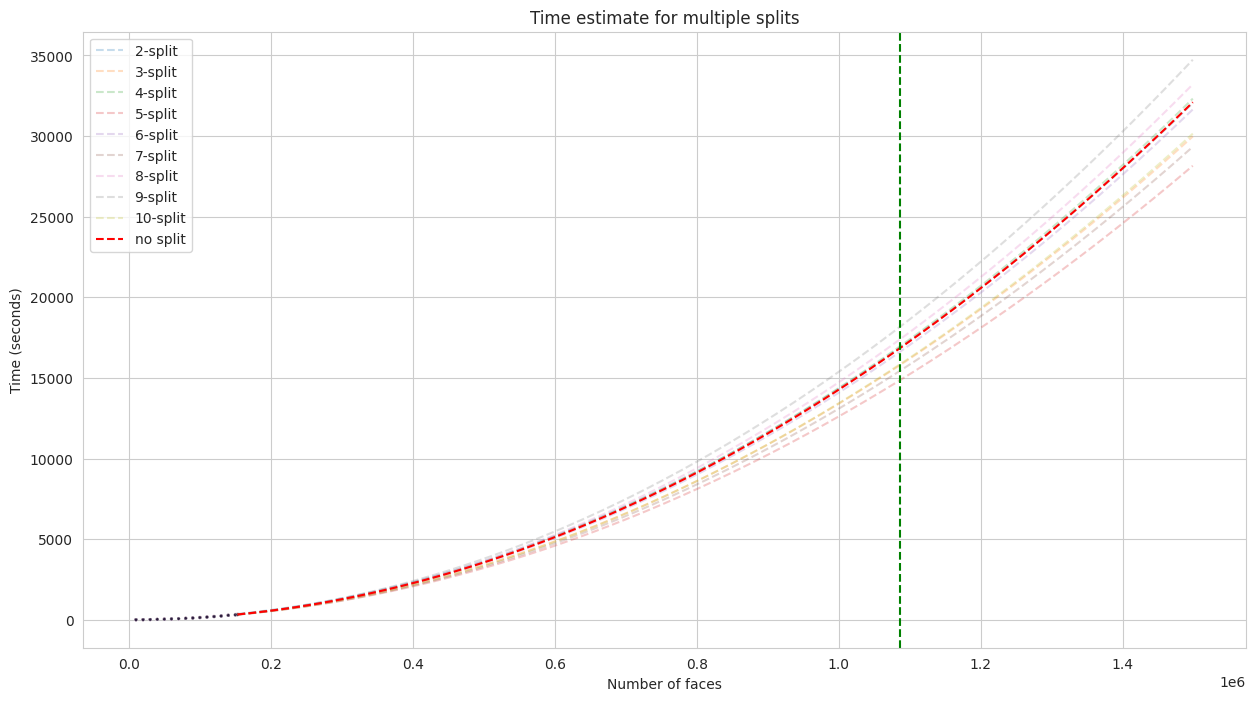

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

# use log scale for the y axis
# ax.set_yscale("log")

sns.scatterplot(x="n", y="time", hue="n_splits", data=df_res, ax=ax, s=5, legend=False)

x = np.arange(df_res['n'].max(), 1_500_001, 1000)
for idx, p in enumerate(ps):
    sns.lineplot(x=x, y=p(x), ax=ax, label=f"{idx+2}-split", dashes=True, alpha=0.25, linestyle="dashed")
    # put the number of splits in the legend
    # ax.plot([], [], '--', alpha=0.20, label=f"{p.order} splits")

# plot the baseline
sns.lineplot(x=x, y=p_baseline(x), ax=ax, color="red", label="no split", dashes=True, alpha=1, linestyle="dashed")


# hightlight the point x = 1_081_180
# use a cross to mark the point
# ax.scatter(x=1_081_180, y=p(1_081_180), color="green", s=50, label="Estimated time for 1M faces", marker="o")
# drawn a line from the point to the x axis
# ax.axhline(y=p(1_081_180), color="green", linestyle="--")
# drawn a line from the point to the y axis
ax.axvline(x=1_086_244, color="green", linestyle="--")

# x label: number of faces
ax.set_xlabel("Number of faces")
# y label: time (seconds)
ax.set_ylabel("Time (seconds)")
# title
ax.set_title("Time estimate for multiple splits")

In [28]:
# get the estimate time for 1_086_244 faces
for idx, p in enumerate(ps):
    print(f"n_splits: {idx+2}, time: {p(1_086_244)}s - {p(1_086_244)/60}min")

n_splits: 2, time: 16883.215612915053s - 281.38692688191753min
n_splits: 3, time: 15788.17632567461s - 263.13627209457684min
n_splits: 4, time: 16954.551496671407s - 282.5758582778568min
n_splits: 5, time: 14850.390506881897s - 247.5065084480316min
n_splits: 6, time: 16611.621861010233s - 276.8603643501705min
n_splits: 7, time: 15431.578879159762s - 257.19298131932936min
n_splits: 8, time: 17385.141163680728s - 289.7523527280121min
n_splits: 9, time: 18160.759662013585s - 302.6793277002264min
n_splits: 10, time: 15836.045285759936s - 263.9340880959989min


In [29]:
print(f"n_splits: 1, time: {p_baseline(1_086_244)}s - {p_baseline(1_086_244)/60}min")

n_splits: 1, time: 16835.908392409623s - 280.59847320682707min


In [30]:
16679.012288936887 / 60 /60

4.633058969149135